# Ukraine Russia War twitter Sentiment Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv('filename.csv')
print(data.head())

                    id      conversation_id               created_at  \
0  1529294373065990145  1529294373065990145  2022-05-25 02:52:46 UTC   
1  1529294372189405184  1529195901377736705  2022-05-25 02:52:45 UTC   
2  1529294371522240512  1529294371522240512  2022-05-25 02:52:45 UTC   
3  1529294369823502337  1528709400394866689  2022-05-25 02:52:45 UTC   
4  1529294366811885568  1529294366811885568  2022-05-25 02:52:44 UTC   

         date      time  timezone              user_id        username  \
0  2022-05-25  02:52:46         0  1498854813807034369  jimmy_james_nz   
1  2022-05-25  02:52:45         0             18596861          persse   
2  2022-05-25  02:52:45         0  1500900744660230146   sanctionsahoy   
3  2022-05-25  02:52:45         0  1419475710985465860     usedtrifles   
4  2022-05-25  02:52:44         0   839420851099471873  counterchekist   

                               name place  ... geo source user_rt_id user_rt  \
0                             James   NaN 

In [4]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [6]:
data = data[['username', 'tweet', 'language']]
print(data.head())

         username                                              tweet language
0  jimmy_james_nz  You should know by now why Russia is moving sl...       en
1          persse  @WarintheFuture @MaxBoot Unfortunately for you...       en
2   sanctionsahoy  #Russia #oligarch Aleksandr #Svetakov's #yacht...       en
3     usedtrifles  @WellHereWeBe @dmach21 @Yun_Vrillion @24qdu @R...       en
4  counterchekist  Russia invaded Georgia in 2008. The world igno...       en


In [9]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [10]:
data['language'].value_counts()

en     9061
pt      451
und     120
it      100
in       49
es       46
ca       28
ja       25
ru       19
tl       16
zh       11
fr       11
fi        9
ar        7
et        6
de        6
uk        6
hi        5
ro        5
ta        4
nl        4
da        3
pl        3
tr        3
no        3
cy        2
ne        2
cs        2
te        2
sr        1
ko        1
hu        1
kn        1
ur        1
el        1
lv        1
Name: language, dtype: int64

In [11]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('http?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]'% re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = ' '.join(text)
    return text
data['tweet'] = data['tweet'].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\ZAIDH
[nltk_data]     FAIZAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


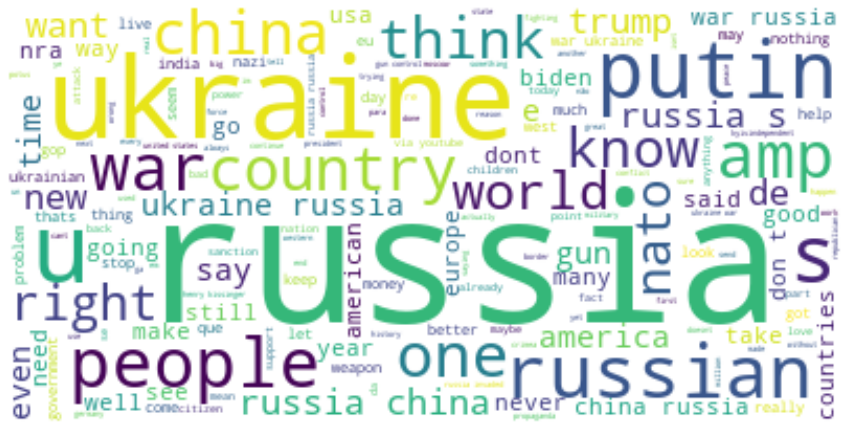

In [12]:
text = ' '.join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords , background_color = 'white').generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['tweet']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['tweet']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['tweet']]
data = data[['tweet' , 'Positive', 'Negative', 'Neutral']]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\ZAIDH
[nltk_data]     FAIZAL\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0  know russia moving slowly ukraine forces fight...     0.081     0.301   
1  warinthefuture maxboot unfortunately russia ge...     0.000     0.324   
2  russia oligarch aleksandr svetakovs yacht clou...     0.000     0.000   
3  wellherewebe  yunvrillion  revstatus russia th...     0.087     0.370   
4  russia invaded georgia  world ignored  russia ...     0.000     0.279   

   Neutral  
0    0.618  
1    0.676  
2    1.000  
3    0.542  
4    0.721  


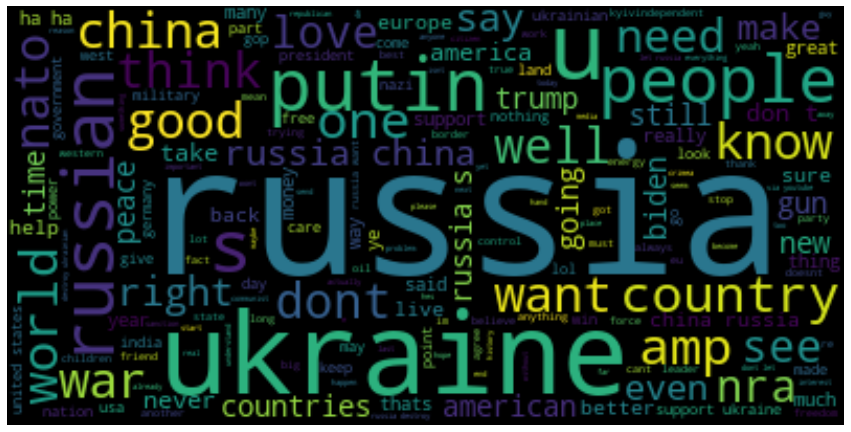

In [16]:
# now let's look at most frequent words used by people with positive sentiments
positive = ' '.join([i for i in data['tweet'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords , background_color = 'black').generate(positive)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

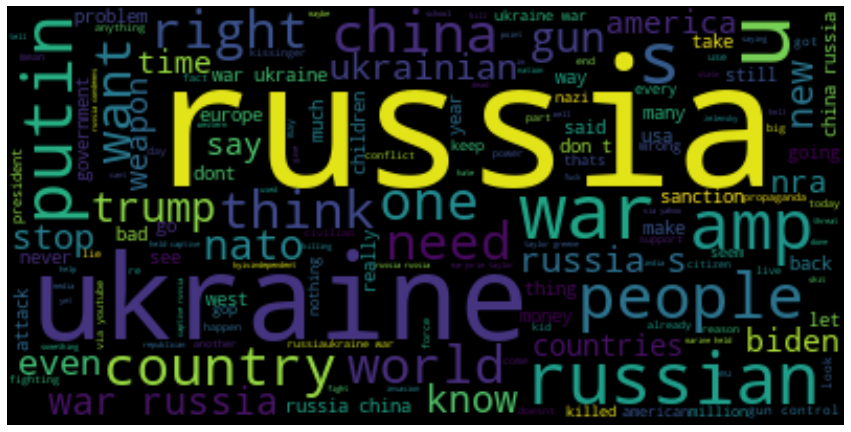

In [17]:
negative = ' '.join([i for i in data['tweet'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords , background_color = 'black').generate(negative)
plt.figure(figsize = (15, 15))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()